In [64]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


In [65]:
data = pd.read_csv('data.csv')

stop = stopwords.words('english')
x = data.description
y = data.points

In [66]:
corpus = []
IGNORE = False
for i in range(len(x)):
    if IGNORE == False:
        review = x[i].split(" ")
        review = [word for word in review if word not in stop]
        review = ' '.join(review)
        corpus.append(review)
    else:
        review = [i].split(" ")
        review = [word for word in review]
        review = ' '.join(review)
        corpus.append(review)    


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame({"Description": corpus, "Points":y})

df

,Description,Points
0,This tremendous 100% varietal wine hails Oakvi...,96
1,"Ripe aromas fig, blackberry cassis softened sw...",96
2,Mac Watson honors memory wine made mother trem...,96
3,"This spent 20 months 30% new French oak, incor...",96
4,"This top wine La Bégude, named highest point v...",95
...,...,...
150925,Many people feel Fiano represents southern Ita...,91
150926,"Offers intriguing nose ginger, lime floral ele...",91
150927,This classic example comes cru vineyard called...,91
150928,"A perfect salmon shade, scents peaches, cherri...",90


In [ ]:
bins = [80, 84, 90, 94, 100]
labels = [1, 2, 3, 4]


df['Points_Class'] = pd.cut(df['Points'], bins=bins, labels=labels, include_lowest=True)

df

,Description,Points,Points_Class
0,This tremendous 100% varietal wine hails Oakvi...,96,4
1,"Ripe aromas fig, blackberry cassis softened sw...",96,4
2,Mac Watson honors memory wine made mother trem...,96,4
3,"This spent 20 months 30% new French oak, incor...",96,4
4,"This top wine La Bégude, named highest point v...",95,4
...,...,...,...
150925,Many people feel Fiano represents southern Ita...,91,3
150926,"Offers intriguing nose ginger, lime floral ele...",91,3
150927,This classic example comes cru vineyard called...,91,3
150928,"A perfect salmon shade, scents peaches, cherri...",90,2


In [ ]:
p1=len(df[df['Points_Class'] == 1])/len(df)
p2=len(df[df['Points_Class'] == 2])/len(df)
p3=len(df[df['Points_Class'] == 3])/len(df)
p4=len(df[df['Points_Class'] == 4])/len(df)

print(p1)
print(p2)
print(p3)
print(p4)


0.1536937653216723
0.6327171536473862
0.19383820314052871
0.019750877890412775


In [ ]:
def create_binary_bag_of_words(documents):
    vocabulary = set()
    binary_bow = []

    # build vocabulary
    for doc in documents:
        words = doc.split()
        for word in words:
            vocabulary.add(word)

    # create binary bag of words
    for doc in documents:
        binary_vector = []
        words = doc.split()
        for word in vocabulary:
            if word in words:
                binary_vector.append(1)
            else:
                binary_vector.append(0)
        binary_bow.append(binary_vector)

    return binary_bow, list(vocabulary)

In [ ]:
df2 = pd.DataFrame({"Text": corpus, "Points":df["Points_Class"]})


In [ ]:
df2

,Text,Points
0,This tremendous 100% varietal wine hails Oakvi...,4
1,"Ripe aromas fig, blackberry cassis softened sw...",4
2,Mac Watson honors memory wine made mother trem...,4
3,"This spent 20 months 30% new French oak, incor...",4
4,"This top wine La Bégude, named highest point v...",4
...,...,...
150925,Many people feel Fiano represents southern Ita...,3
150926,"Offers intriguing nose ginger, lime floral ele...",3
150927,This classic example comes cru vineyard called...,3
150928,"A perfect salmon shade, scents peaches, cherri...",2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2["Text"], df2["Points"], test_size=0.2, random_state=20454593)

In [ ]:
binary_bag_train, vocabulary_train = create_binary_bag_of_words(X_train)
X_train = binary_bag_train

In [ ]:
len(X_test)

30186

In [ ]:
one = np.count_nonzero(y_train == 1) / len(y_train)
two = np.count_nonzero(y_train == 2) / len(y_train)
three = np.count_nonzero(y_train == 3) / len(y_train)
four = np.count_nonzero(y_train == 4) / len(y_train)

print(one, two, three, four)

0.15364738620552573 0.6324123765984231 0.1940800371032929 0.019860200092758233


In [ ]:
V_size = len(vocabulary_train)
V_size

70951

In [ ]:
total_one_words = 0
total_two_words = 0
total_three_words = 0
total_four_words = 0


for i in range(len(X_train)):
    if y_train.iloc[i] == 1:
        for number in X_train[i]:
            total_one_words += number
    elif y_train.iloc[i] == 2:
        for number in X_train[i]:
            total_two_words += number
    elif y_train.iloc[i] == 3:
        for number in X_train[i]:
            total_three_words += number
    elif y_train.iloc[i] == 4:
        for number in X_train[i]:
            total_four_words += number

print(total_one_words)
print(total_two_words)
print(total_three_words)
print(total_four_words)

370362
1952574
713473
83637


In [ ]:
one_prob = {}
two_prob = {}
three_prob = {}
four_prob = {}

for i in range(len(X_train)):
    if y_train.iloc[i] == 1:
        # print("one")
        for j in range(len(X_train[i])):
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 2/(total_one_words+(1*V_size))
                else:
                    one_prob[vocabulary_train[j]] = one_prob[vocabulary_train[j]] + 1/(total_one_words+(1*V_size))
                
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 1/(total_two_words+(1*V_size))
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 1/(total_three_words+(1*V_size))
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 1/(total_four_words+(1*V_size))
                

    elif y_train.iloc[i] == 2:
        for j in range(len(X_train[i])):
            # print("two")
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 2/(total_two_words+(1*V_size))
                else:
                    two_prob[vocabulary_train[j]] = two_prob[vocabulary_train[j]] + 1/(total_two_words+(1*V_size))
                
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 1/(total_one_words+(1*V_size))
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 1/(total_three_words+(1*V_size))
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 1/(total_four_words+(1*V_size))

    elif y_train.iloc[i] == 3:
        for j in range(len(X_train[i])):
            # print("three")
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 2/(total_three_words+(1*V_size))
                else:
                    three_prob[vocabulary_train[j]] = three_prob[vocabulary_train[j]] + 1/(total_three_words+(1*V_size))
                
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 1/(total_one_words+(1*V_size))
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 1/(total_two_words+(1*V_size))
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 1/(total_four_words+(1*V_size))

    else:
        for j in range(len(X_train[i])):
            # print("four")
            if X_train[i][j] == 1:
                if vocabulary_train[j] not in four_prob:
                    four_prob[vocabulary_train[j]] = 2/(total_four_words+(1*V_size))
                else:
                    four_prob[vocabulary_train[j]] = four_prob[vocabulary_train[j]] + 1/(total_four_words+(1*V_size))
                
                if vocabulary_train[j] not in one_prob:
                    one_prob[vocabulary_train[j]] = 1/(total_one_words+(1*V_size))
                if vocabulary_train[j] not in two_prob:
                    two_prob[vocabulary_train[j]] = 1/(total_two_words+(1*V_size))
                if vocabulary_train[j] not in three_prob:
                    three_prob[vocabulary_train[j]] = 1/(total_three_words+(1*V_size))


In [ ]:
test_df = pd.DataFrame({"Text": X_test, "Points":y_test}).reset_index()
predictions = []
for row in test_df['Text']:
    one_x = np.log(one)
    two_x = np.log(two)
    three_x = np.log(three)
    four_x = np.log(four)

    # pos = Prob_pos
    # neg = Prob_neg
    for word in row.split():
        if word in vocabulary_train:
            one_x += np.log(one_prob[word])
            two_x += np.log(two_prob[word])
            three_x += np.log(three_prob[word])
            four_x += np.log(four_prob[word])
            # pos *= pos_prob[word]
            # neg *= neg_prob[word]
    if max(one_x, two_x, three_x, four_x) == one_x:
        predictions.append(1)
    elif max(one_x, two_x, three_x, four_x) == two_x:
        predictions.append(2)
    elif max(one_x, two_x, three_x, four_x) == three_x:
        predictions.append(3)
    elif max(one_x, two_x, three_x, four_x) == four_x:
        predictions.append(4)


In [ ]:
def create_metrics(actual, predicted):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(actual)):
        if actual[i] == 3:
            if actual[i] == predicted[i]:
                TP += 1
            else:
                FN += 1
        else:
            if actual[i] == predicted[i]:
                TN += 1
            else:
                FP += 1
    recall = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    negative_predictive_value = TN/(TN+FN)
    accuracy = (TP+TN)/(TN+TP+FP+FN)
    F_score= 2*((recall*precision)/(recall+precision))

    return TP, TN, FP, FN, recall, specificity, precision, negative_predictive_value, accuracy, F_score

In [ ]:
def predict(sentence):
    onex = np.log(one)
    twox = np.log(two)
    threex = np.log(three)
    fourx = np.log(four)

    for word in sentence.split():
        if word in vocabulary_train:
            onex += np.log(one_prob[word])
            twox += np.log(two_prob[word])
            threex += np.log(three_prob[word])
            fourx += np.log(four_prob[word])
    return onex, twox ,threex, fourx


In [ ]:
TP, TN, FP, FN, recall, specificity, precision, negative_predictive_value, accuracy, F_score = create_metrics(test_df['Points'], predictions)

In [ ]:


print(f'Number of true positives: {TP}')
print(f'Number of true negatives: {TN}')
print(f'Number of false positives: {FP}')
print(f'Number of false negatives: {FN}')
print(f'Sensitivity (recall): {recall}')
print(f'Specificity: {specificity}')
print(f'Precision: {precision}')
print(f'Negative predictive value: {negative_predictive_value}')
print(f'Accuracy: {accuracy}')
print(f'F-score: {F_score}')


Number of true positives: 4027
Number of true negatives: 18850
Number of false positives: 5514
Number of false negatives: 1795
Sensitivity (recall): 0.6916867055994503
Specificity: 0.7736824823510097
Precision: 0.4220731579499004
Negative predictive value: 0.9130540082344394
Accuracy: 0.7578678857748625
F-score: 0.5242465664258282


In [ ]:
S = input('Enter your sentence: ')
print(f'Sentence S: \n{S}')




Sentence S: 
helloo good


In [ ]:
onex, twox ,threex, fourx = predict(S)


if onex > twox and onex > threex and onex > fourx:
    classification = 'Class 1 (Least)'
elif twox > onex and twox > threex and twox > fourx:
    classification = 'Class 2 (Lower Mid)'
elif threex > onex and threex > twox and threex > fourx:
    classification = 'Class 3 (Upper Mid)'
elif fourx > onex and fourx > twox and fourx > threex:
    classification = 'Class 4 (Most)'

print(f'Was classified as {classification}.')
print(f'P(Class 1 | S) = {np.e**onex}')
print(f'P(Class 2 | S) = {np.e**twox}')
print(f'P(Class 3 | S) = {np.e**threex}')
print(f'P(Class 4 | S) = {np.e**fourx}')

Was classified as Class 2 (Lower Mid).
P(Class 1 | S) = 0.00041744343824093755
P(Class 2 | S) = 0.0022689681887324673
P(Class 3 | S) = 0.0003444048265323027
P(Class 4 | S) = 1.1305519239285872e-05


In [ ]:
# Calculate the TPR and FPR for each model
fpr1, tpr1, thresholds1 = roc_curve(test_df['Points'], predictions)

# Plot the ROC curves
plt.plot(fpr1, tpr1, label='All preprocessing', color="#2D398B")
# plt.plot(fpr2, tpr2, label='Without removing stop words', color="#C14169")
# plt.plot([0, 1], [0, 1], 'k--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


ValueError: multiclass format is not supported

In [67]:
test_df.shape

(30186, 3)

In [68]:
predictions_array = np.array(predictions)  # Convert to NumPy array

(30186, 4)


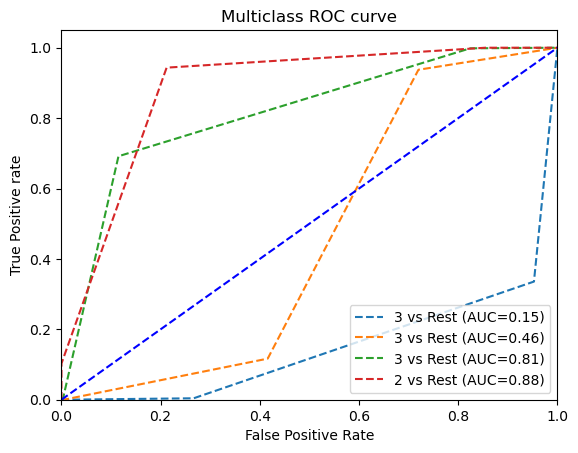

In [76]:
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = y_test_binarized.shape[1]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])
 
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(a[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()